In [66]:
from image_utils import *
from json_utils import *
from display_utils import *
from PIL import Image
from tqdm.notebook import tqdm

In [31]:
image_name = "L15-1186E-0942N_tile_2_3"
image_file_path = "../original_images/" + image_name + ".jpg"
json_file_path = "../input_json/" + image_name + ".json"

# Load the image
original_image = Image.open(image_file_path)

In [32]:
with open(json_file_path, 'r') as json_file:
    json_data = json.load(json_file)

arrays = json2list(json_data)
print(f"Number of masks generated by SAM: {len(arrays)}.")

Number of masks generated by SAM: 172.


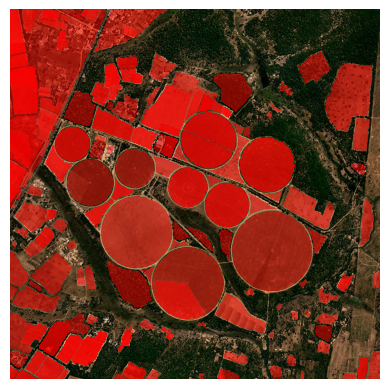

In [34]:
display_masks_on_image(original_image,arrays)

In [68]:
 # Initialize a list to store the candidates
candidates = [[], []]

 # For each array
for i, array in tqdm(enumerate(arrays),total = len(arrays)):
    # Perform watershed segmentation
    labels = watershed(array)

    # Remove small objects
    labels = remove_small_objects(labels, min_size_ratio=0.005)

    # Detect circles and semi-circles
    circle_regions, semi_circle_regions = detect_circles_and_semi_circles(
    labels, min_circular_ratio = 0.92, max_circular_ratio =1.03, min_semi_ratio = 0.4, max_semi_ratio = 0.6)

    # Add the circle regions to the list of candidates
    candidates[0].extend(circle_regions)

    # Add the semi-circle regions to the list of candidates
    candidates[1].extend(semi_circle_regions)

print("Done!")

  0%|          | 0/172 [00:00<?, ?it/s]

Done!


Number of circles detected: 14.


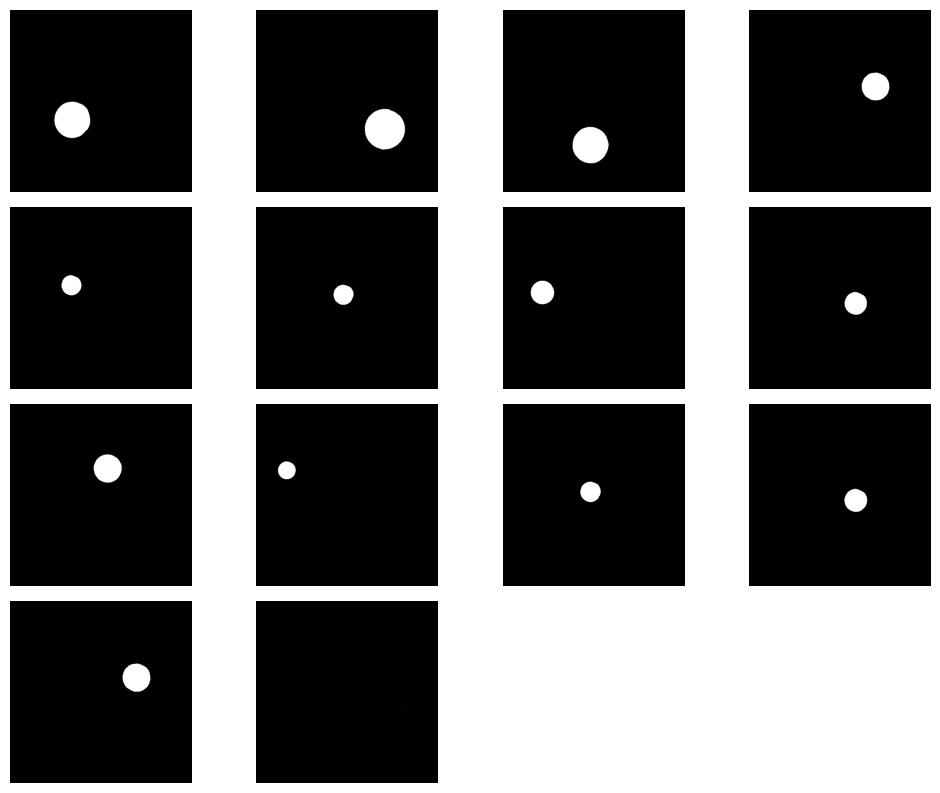

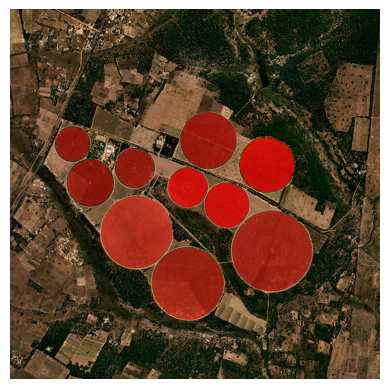

In [62]:
print(f"Number of circles detected: {len(candidates[0])}.")
show_all_masks(candidates[0])
display_masks_on_image(original_image, candidates[0])

Number of semi-circle regions detected: 5.


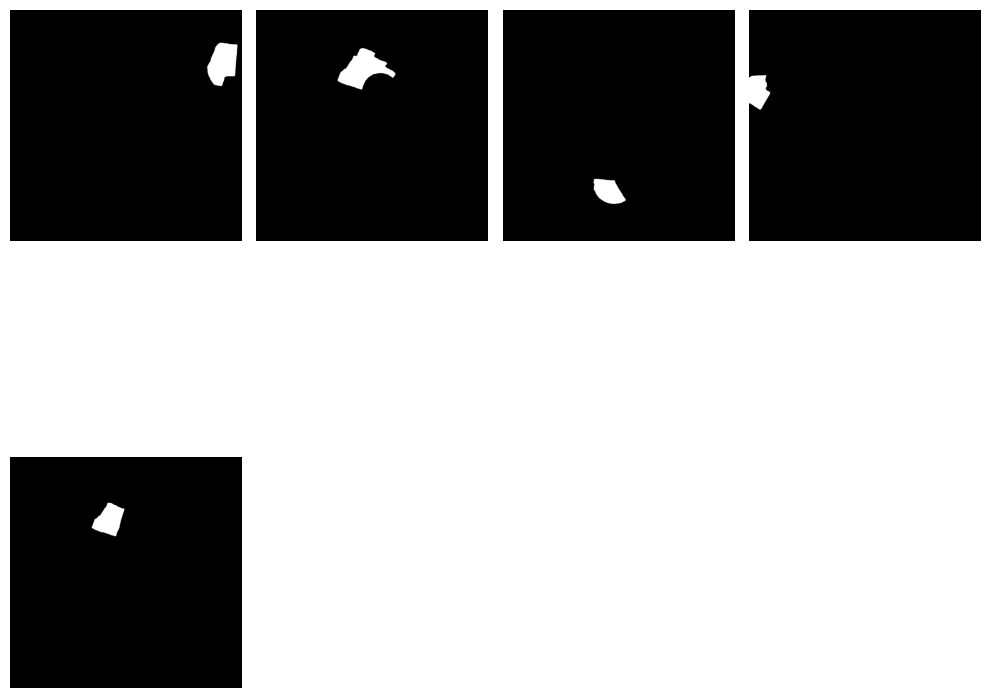

In [36]:
print(f"Number of semi-circle regions detected: {len(candidates[1])}.")
show_all_masks(candidates[1])

In [50]:
 # Merge and segment the semi-circle candidates
new_circles = merge_and_segment(candidates[1], min_circular_ratio=0.7, max_circular_ratio=1.1)

In [54]:
print(f"Number of new merged semi-circles: {len(new_circles)}.")
show_all_masks(new_circles)

Number of new merged semi-circles: 0.


ZeroDivisionError: integer division or modulo by zero

In [40]:
all_circles = candidates[0] + new_circles #add the new merged semi-circles to the circles list
len(all_circles)

9

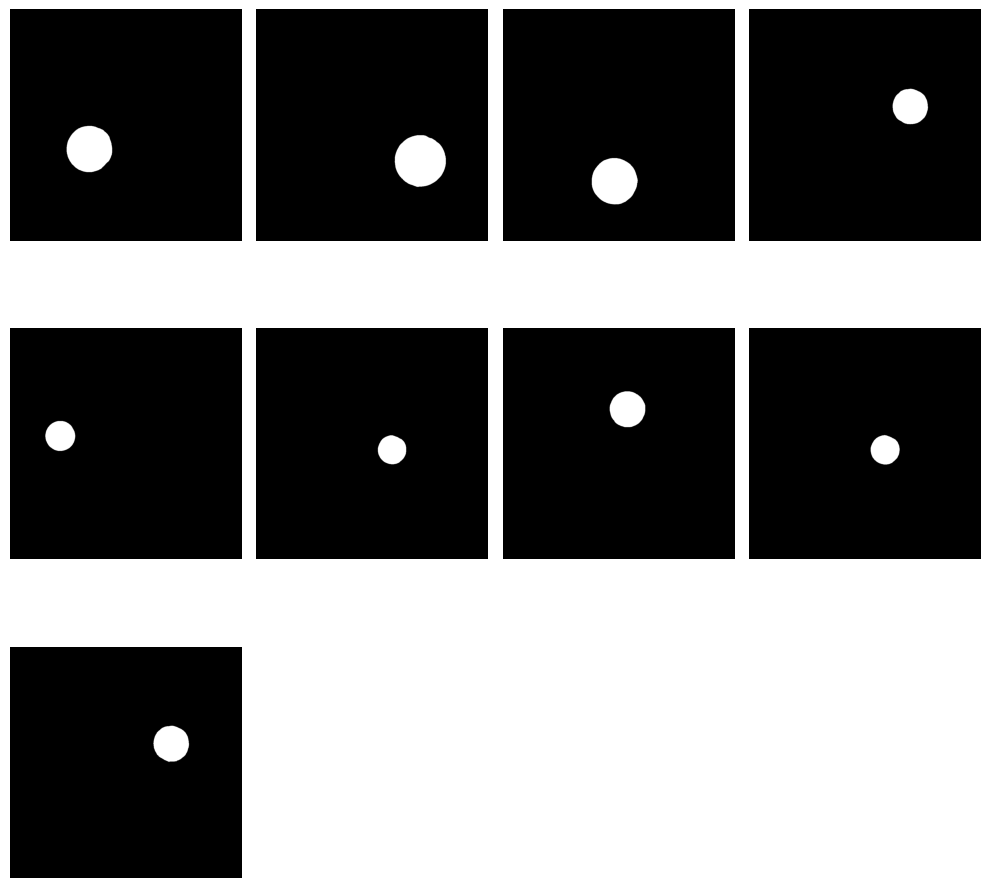

In [41]:
show_all_masks(candidates[0])

In [42]:
unique_masks = remove_duplicates(candidates[0],0.5)

Number of unique circles: 7.


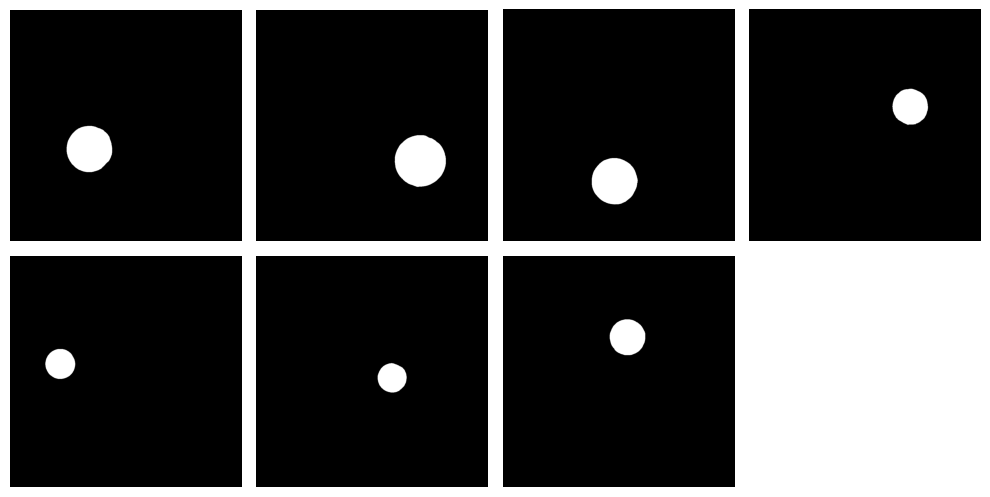

In [43]:
print(f"Number of unique circles: {len(unique_masks)}.")
show_all_masks(unique_masks)

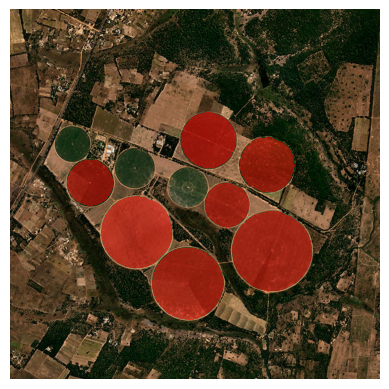

In [44]:
display_masks_on_image(original_image,unique_masks)